In [1]:
import numpy as np
from scipy import misc, signal
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.signal import freqz
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter    
from PIL import Image
import time
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import tensorflow as tf
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

In [3]:
def mask(proc_img, radius):
    center = 1024
    X = np.arange(2048)
    Y = np.arange(2048)
    X, Y = np.meshgrid(X, Y)
    mask = (X-center)**2 + (Y-center)**2 > radius**2
    proc_img[mask] = 0
    return proc_img

In [4]:
def mesh_plot(img, savefolder = None, save_image=False, title=''):
    global img_num
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')
    #img = mask(img,1024)
    #img = np.absolute(img)

    img_shape = img.shape
    X = np.arange(img.shape[-2])
    Y = np.arange(img.shape[-1])
    X, Y = np.meshgrid(X,Y)
    Z = img
    surf = ax.plot_surface(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if title:
        plt.suptitle(title)
    if title and savefolder and save_image:
        fig.savefig(os.path.join(savefolder,str(img_num)+'_'+title+'.png'))
    plt.show()
    
    plt.close()
    return

In [5]:
def fig_plot(imgs):
    fig = plt.figure(figsize=(10,24))
    #ax1 = fig.add_subplot(131)  # left side
    #ax2 = fig.add_subplot(132)  # right side
    #ax3 = fig.add_subplot(133)
    plt.subplot(1,3,1)
    
    vmins = [np.amin(x) for x in imgs]
    vmaxs = [np.mean(x) for x in imgs]
    print vmins, vmaxs,
    vmin = np.median(vmins)
    vmax = np.max(vmaxs)
    print vmin, vmax
    #fig, axes = plt.subplots(nrows=1, ncols=3)
    #im = axes[0].imshow(imgs[0])
    #clim = im.properties()['clim']
    #axes[1].imshow(imgs[0], clim= clim)
    plt.imshow(imgs[0], cmap='jet', vmin=0.1, vmax=1500)
    plt.subplot(1,3,2)
    #axes[2].imshow(imgs[1], clim=clim)
    plt.imshow(imgs[1], cmap='jet', vmin=0.1, vmax=1500)
    plt.subplot(1,3,3)
    #ax3.imshow(imgs[2], cmap= 'jet')
    plt.imshow(imgs[2], cmap='jet', vmin=0.1, vmax=1500)
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax)
    #fig.colorbar(im, ax = axes.ravel().tolist(), shrink=0.5)
    plt.show()
    plt.close()

In [38]:
def fig_plot2(imgs, titles, vmax=700, fig_name=None):
    fig = plt.figure(figsize=(10,6))
    #ax1 = fig.add_subplot(131)  # left side
    #ax2 = fig.add_subplot(132)  # right side
    #ax3 = fig.add_subplot(133)
    
    #vmins = [np.amin(x) for x in imgs]
    #vmaxs = [np.mean(x) for x in imgs]
    #print vmins, vmaxs,
    #vmin = np.median(vmins)
    #vmax = np.max(vmaxs)
    #print vmin, vmax
    #fig, axes = plt.subplots(nrows=1, ncols=3)
    #im = axes[0].imshow(imgs[0])
    #clim = im.properties()['clim']
    #axes[1].imshow(imgs[0], clim= clim)
    #plt.subplot(2,4,5)
    #plt.imshow(imgs[0], cmap='jet', vmin=0.1, vmax=vmax)
    #plt.subplot(2,4,2)
    #axes[2].imshow(imgs[1], clim=clim)
    #plt.imshow(imgs[1], cmap='jet', vmin=0.1, vmax=vmax)
    #plt.subplot(1,3,3)
    #ax3.imshow(imgs[2], cmap= 'jet')
    #plt.imshow(imgs[2], cmap='jet', vmin=0.1, vmax=vmax)
    for i,img in enumerate(imgs):
        if img is None: continue
        plt.subplot(2,3,i+1)
        plt.imshow(imgs[i], cmap='jet', vmin=0.1, vmax=vmax)
        ax = plt.gca()
        ax.set_title(titles[i])
        ax.set_axis_off()
        
    ax = plt.gca()
    #divider = make_axes_locatable(ax)
    plt.subplots_adjust(hspace=0.15,
                    wspace=0.1, right=0.9)
    
    #cax = divider.append_axes("right", size="10%", pad=0.05)
    cax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
    plt.colorbar(cax=cax)
    #plt.tight_layout()
    #fig.colorbar(im, ax = axes.ravel().tolist(), shrink=0.5)
    if fig_name: plt.savefig(fig_name)
    plt.show()
    plt.close()

In [7]:
data_path = 'training-data'
slac_tif_path = os.path.join(data_path, 'SLAC_images-TIF')
slac_tif_files = ['%d.tif'%(x) for x in range(1,178)]
slac_tif_file_paths = [os.path.join(slac_tif_path, x) for x in slac_tif_files]
#print slac_tif_file_paths

In [8]:
bruker_tif_path = os.path.join(data_path, 'Bruker_images-TIF')
bruker_tif1_files = ['%d_1.tif'%(x) for x in range(1,178)]
bruker_tif2_files = ['%d_2.tif'%(x) for x in range(1,178)]
bruker_tif1_file_paths = [os.path.join(bruker_tif_path, x) for x in bruker_tif1_files]
bruker_tif2_file_paths = [os.path.join(bruker_tif_path, x) for x in bruker_tif2_files]
#print bruker_tif1_files

### Minimum background filter with conv smoothening

In [9]:
def apply_min_filter(img, filt_size=200):
    return ndimage.minimum_filter(img, size=filt_size, mode='mirror')

In [10]:
test = [[x+y for x in range(6)] for y in range(6)]
test = np.asarray(test)
test_min = ndimage.minimum_filter(test, size=3, mode='mirror')
print test
print test_min

[[ 0  1  2  3  4  5]
 [ 1  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]]
[[0 0 1 2 3 4]
 [0 0 1 2 3 4]
 [1 1 2 3 4 5]
 [2 2 3 4 5 6]
 [3 3 4 5 6 7]
 [4 4 5 6 7 8]]


In [11]:
filt_size = 200
conv_filter = [[1.0 for x in range(filt_size)] for y in range(filt_size)]
conv_filter /= np.sum(np.absolute(np.reshape(conv_filter,-1)))
def conv_bg_smooth(img):
    return ndimage.convolve(img, conv_filter, mode='mirror')
filt_size = 200

### Computing bg using
###### A Pipelining Implementation for Parsing X-ray Diffraction Source Data and Removing the Background Noise

In [12]:
def compute_ratio(img, bg, filt_size=50):
    img_cr = np.empty(shape=img.shape, dtype=np.float32)
    #compute_ratio = lambda i, j: min([img[i_][j_]/bg[i_][j_] for i_ in range(max(0,i-filt_size), min(i+filt_size, img.shape[0])) for j_ in range(max(0,j-filt_size), min(j+filt_size, img.shape[0]))])
    img_bg_rat = np.divide(bg.astype(np.float32), img)
    img_bg_rat[np.isnan(img_bg_rat)] = 0
    compute_ratio = lambda i, j: np.amin(img_bg_rat[max(0,i-filt_size):min(i+filt_size, img.shape[0]), max(0,j-filt_size):min(j+filt_size, img.shape[0])])
    for i in range(img.shape[1]):
        #print(i)
        for j in range(img.shape[0]):
            img_cr[i][j] = min(compute_ratio(i,j),1)
            #if img_cr[i][j]<0: 
            #    print img_cr[i][j]
            #    return img_cr
    return img_cr

In [13]:
def compute_bg(img, img_cr, bg, filt_size = 50):
    img_bg = np.empty(shape=img.shape, dtype=np.float32)
    #bg_cr = lambda i, j: max([img_cr[i_][j_]*bg[i_][j_] for i_ in range(max(0,i-filt_size), min(i+filt_size, img.shape[0])) for j_ in range(max(0,j-filt_size), min(j+filt_size, img.shape[0]))])
    img_bg_cr = np.multiply(img_cr, img)
    bg_cr = lambda i,j: np.amax(img_bg_cr[max(0,i-filt_size):min(i+filt_size, img.shape[0]), max(0,j-filt_size):min(j+filt_size, img.shape[0])])
    for i in range(img.shape[1]):
        #print(i)
        for j in range(img.shape[0]):
            img_bg[i][j] = min(img[i,j], bg_cr(i,j))
            #img_bg[i][j] = bg_cr(i,j)
    return img_bg

### Process and store SLAC

processing:  0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


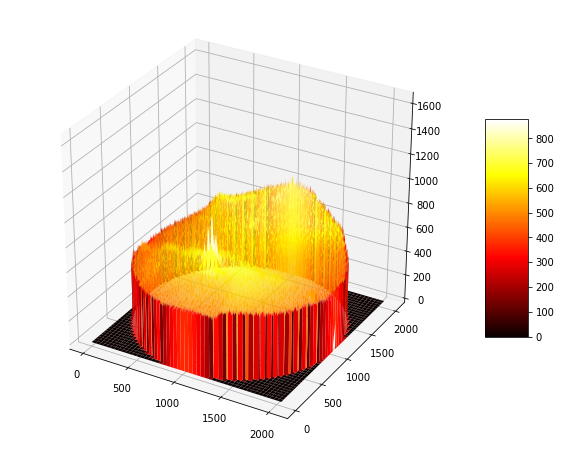

CPU times: user 1.8 s, sys: 1.03 s, total: 2.83 s
Wall time: 1.74 s



In [14]:
%%time
#for i in range(1,178)[:0]:
print 'processing: ', 0,
img = misc.imread(slac_tif_file_paths[0]).astype(np.int32)
#im_min = Image.fromarray(img_min)
#im_min.save(os.path.join(slac_mf_path, str(i)+'.tif'))
mesh_plot(mask(img,1024))

In [15]:
%%time
img_min = apply_min_filter(img)

CPU times: user 146 ms, sys: 10.7 ms, total: 157 ms
Wall time: 141 ms


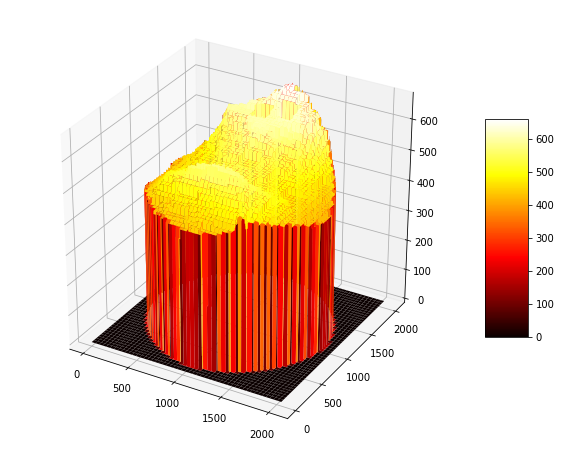

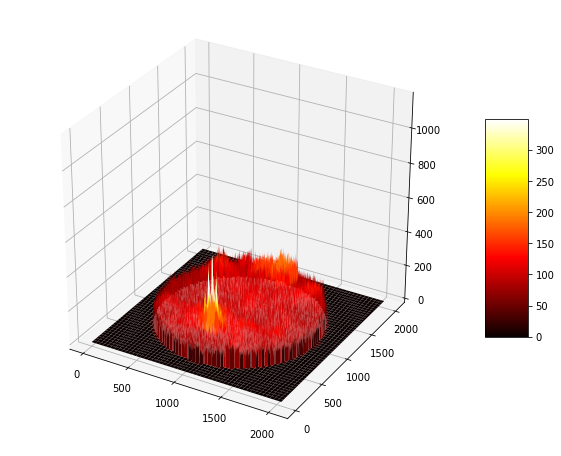

In [16]:
mesh_plot(img_min)
mesh_plot(mask(img-img_min, 1024-200))

In [17]:
from PIL import Image
filt_size = 50
conv_filter = [[1.0 for x in range(filt_size)] for y in range(filt_size)]
conv_filter /= np.sum(np.absolute(np.reshape(conv_filter,-1)))
def bruckner2D(img, q=5, t=5):
    #img_br = np.empty(shape=img.shape, dtype=np.float32)
    img_br = np.copy(img)
    img_br.resize((512,512))
    print img_br.shape
    for k in range(q):
        print k
        for i in range(img_br.shape[0]):
            for _ in range(t):
                avg_filt = [1.0/filt_size for _ in range(filt_size)]
                img_br[i,:] = ndimage.convolve(img_br[i,:], avg_filt, mode='mirror')
        img_br = ndimage.median_filter(img_br, filt_size)
        for i in range(img_br.shape[1]):
            for _ in range(t):
                avg_filt = [1.0/filt_size for _ in range(filt_size)]
                img_br[:,i] = ndimage.convolve(img_br[:,i], avg_filt, mode='mirror')
        img_br = ndimage.median_filter(img_br, filt_size)
    img_br.resize((2048,2048))
    return img_br

In [18]:
# %%time
# img_br = bruckner2D(img)

In [19]:
# mesh_plot(img_br)
# mesh_plot(mask(img-img_br, 1024-200))
# fig_plot([img, img_br, img-img_br])

[0, 0, 0] [475.2714276313782, 309.4323649406433, 165.83906269073486] 0.0 475.2714276313782


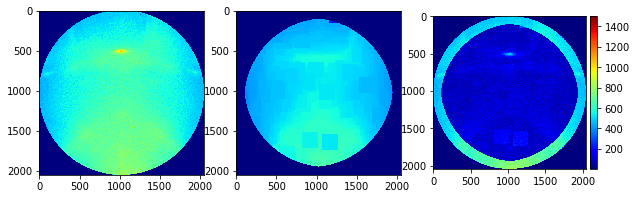

In [20]:
fig_plot([img, img_min, img-img_min])

[0, 0, 0] [475.2714276313782, 265.27707529067993, 55.06097435951233] 0.0 475.2714276313782


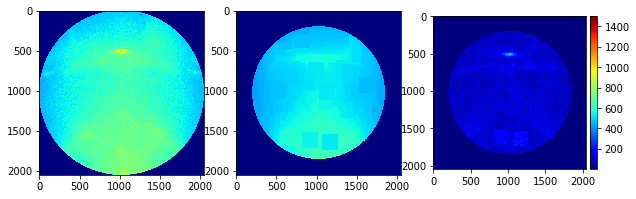

In [21]:
fig_plot([img, mask(img_min, 1024-200), mask(img-img_min,1024-200)])

In [22]:
%%time
# for i in range(1,178)[:1]:
#     print i,
#     img_min = misc.imread(os.path.join(slac_mf_path, str(i)+'.tif'))
img_cs = conv_bg_smooth(img_min)
#     mesh_plot(img_cs)
#     im_cs = Image.fromarray(img_cs)
#     im_cs.save(os.path.join(slac_mf_cs_path, str(i)+'.tif'))

CPU times: user 25.7 s, sys: 50.3 ms, total: 25.7 s
Wall time: 25.7 s


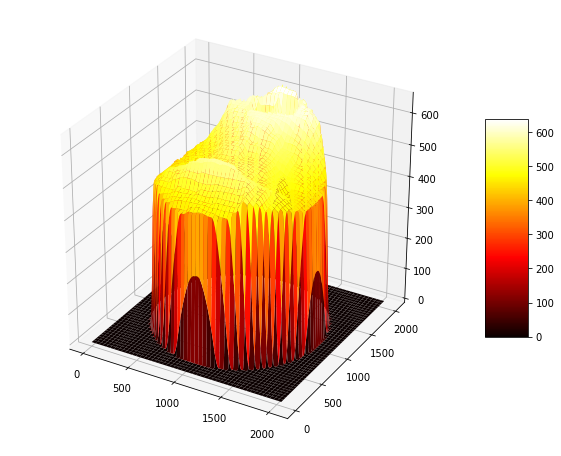

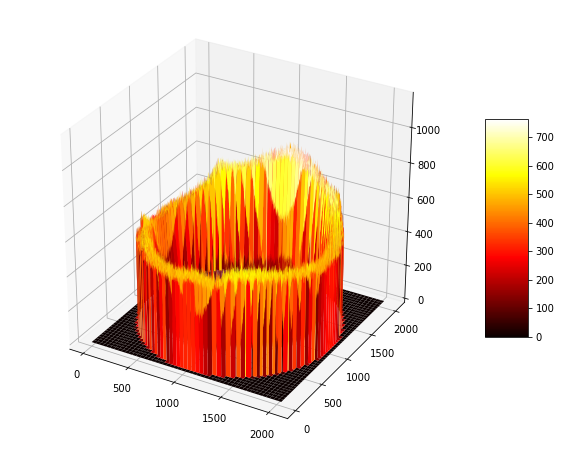

In [23]:
mesh_plot(img_cs)
mesh_plot(mask(img-img_cs,1024-filt_size))

In [24]:
# img_mean = ndimage.mean_filter(img_min, size=filt_size, mode='mirror')
# mesh_plot(img_mean)
# mesh_plot(mask(img-img_mean,1024-filt_size))

In [25]:
%%time
img_cr =  compute_ratio(img, img_cs)
print np.amin(img_cr), np.amax(img_cr)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


0.0 0.77875
CPU times: user 51 s, sys: 17.1 ms, total: 51 s
Wall time: 51 s


In [26]:
#img_cr = conv_bg_smooth_tf(img_cr)

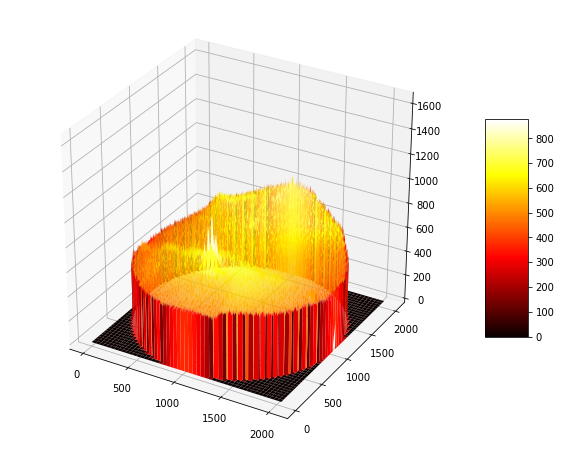

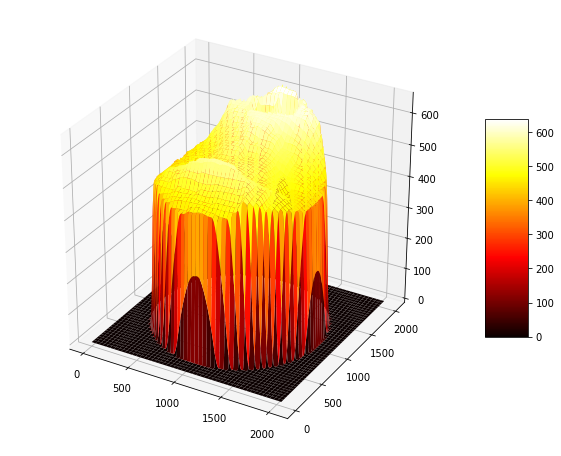

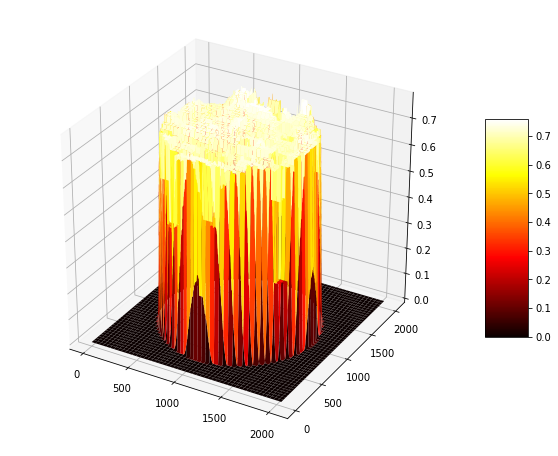

In [27]:
mesh_plot(img)
mesh_plot(img_cs)
mesh_plot(img_cr)

In [28]:
%%time
img_crbg = compute_bg(img, img_cr, img_cs)

CPU times: user 50.5 s, sys: 11.1 ms, total: 50.5 s
Wall time: 50.5 s


[0, 0, 0] [475.2714276313782, 261.3207890987396, 59.01726055145264] 0.0 475.2714276313782


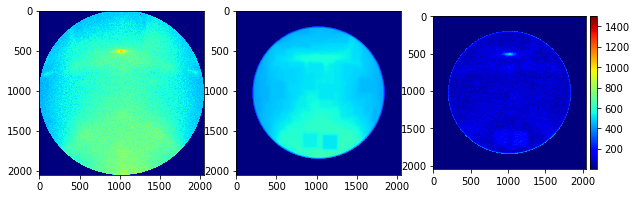

In [29]:
filt_size=200
fig_plot([img, mask(img_cs, 1024-filt_size), mask(img-img_cs,1024-filt_size)])

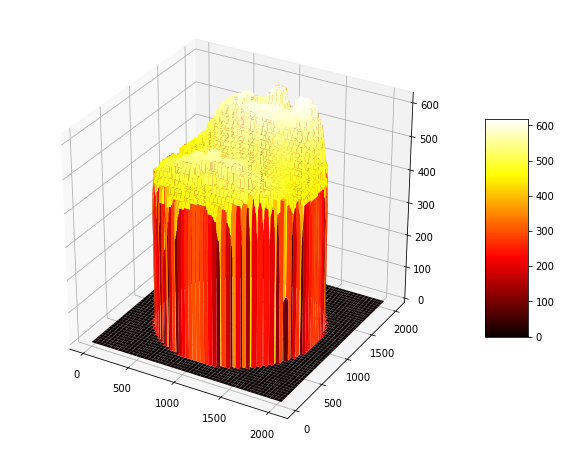

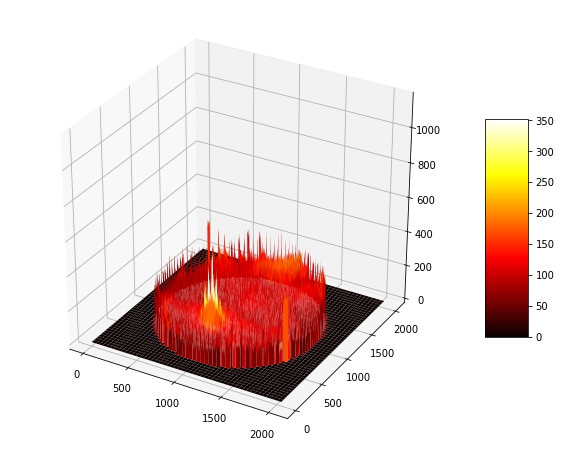

[0, 0.0, 0.0] [261.3207890987396, 257.33905, 55.77100351150875] 0.0 261.3207890987396


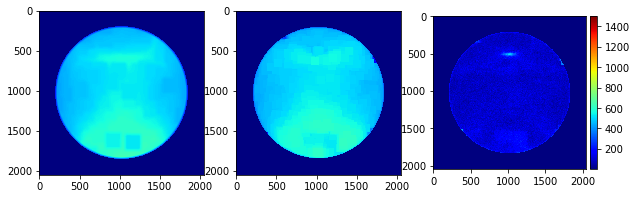

[0.0, 0.0, 0.0] [0.30849528, 257.33905, 55.77100351150875] 0.0 257.33905029296875


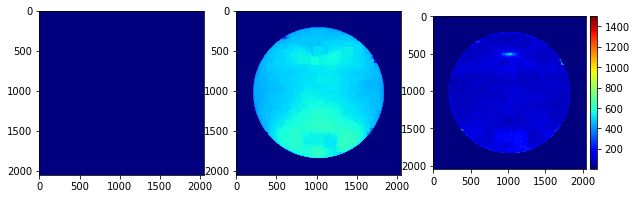

[0, 0, 0] [475.2714276313782, 257.6524360179901, 55.457732915878296] 0.0 475.2714276313782


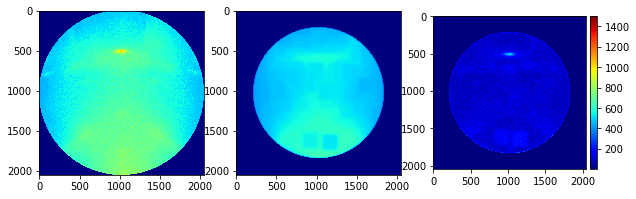

In [30]:
filt_size = 210
mesh_plot(mask(img_crbg, 1024-filt_size))
mesh_plot(mask(img-img_crbg, 1024-filt_size))
fig_plot([img_cs,mask(img_crbg, 1024-filt_size), mask(img-img_crbg, 1024-filt_size)])
fig_plot([img_cr,mask(img_crbg, 1024-filt_size), mask(img-img_crbg, 1024-filt_size)])
fig_plot([img, mask(img_cs, 1024-filt_size), mask(img-img_cs,1024-filt_size)])

In [31]:
# fig_plot2([None, mask(img_min, 1024-filt_size), mask(img_cs, 1024-filt_size),mask(img_crbg, 1024-filt_size), 
#            img, mask(img-img_min, 1024-filt_size), 
#             mask(img-img_cs, 1024-filt_size), 
#            mask(img-img_crbg, 1024-filt_size)], ['','MF', 'CS', 'CRBG', 'TIF', 'TIF-MF', 'TIF-CS', 'TIF-CRBG'])

In [32]:
filt_size = 200
conv_filter = [[1.0 for x in range(filt_size)] for y in range(filt_size)]
conv_filter /= np.sum(np.absolute(np.reshape(conv_filter,-1)))
conv_filter = np.reshape(conv_filter, (1, filt_size, filt_size, 1))
conv_filter = np.array(conv_filter, dtype=np.float32)
conv_filter = np.reshape(conv_filter, (filt_size, filt_size, 1,1))
img_shape = (2048,2048)
def conv_bg_smooth_tf(img, filt_size=filt_size):
    img = np.reshape(img, (1, img.shape[0], img.shape[1],1))
    img = np.array(img, dtype=np.float32)
    #print conv_filter.shape, img.shape
    img_conv = tf.nn.convolution(img, conv_filter, padding='SAME')
    img = np.reshape(img, img_shape)
    return np.reshape(img_conv, img.shape)

In [33]:
%%time
#for i in range(1,178):
#    print i,
#img_min = misc.imread(os.path.join(slac_mf_path, str(i)+'.tif'))
img_cs = conv_bg_smooth_tf(img_min)
#im_cs = Image.fromarray(img_cs)
#im_cs.save(os.path.join(slac_mf_cs_path, str(i)+'.tif'))

CPU times: user 11min 45s, sys: 5.51 s, total: 11min 50s
Wall time: 1min 2s


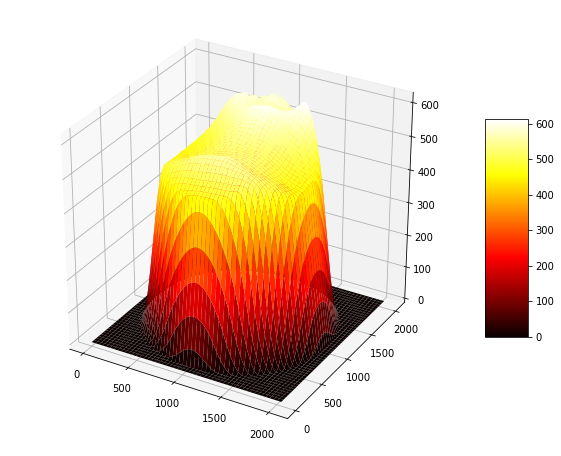

In [34]:
mesh_plot(img_cs)

In [35]:
# def compute_ratio_tf(img, bg, filt_size=50):
#     img_cr = np.empty(shape=img.shape, dtype=np.float32)
#     #compute_ratio = lambda i, j: tf.minimum([img[i_][j_]/bg[i_][j_] for i_ in range(max(0,i-filt_size), min(i+filt_size, img.shape[0])) for j_ in range(max(0,j-filt_size), min(j+filt_size, img.shape[0]))])
#     img_bg_rat = tf.divide(img,bg.astype(np.float32))
#     compute_ratio = lambda i, j: tf.minimum(img_bg_rat[max(0,i-filt_size):min(i+filt_size, img.shape[0]), max(0,j-filt_size):min(j+filt_size, img.shape[0])])
#     for i in range(img.shape[1]):
#         #print(i)
#         for j in range(img.shape[0]):
#             img_cr[i][j] = tf.minimum(compute_ratio(i,j),1)
#     return img_cr

In [36]:
# def compute_bg_tf(img, img_cr, bg, filt_size = 50):
#     img_bg = np.empty(shape=img.shape, dtype=np.float32)
#     #bg_cr = lambda i, j: max([img_cr[i_][j_]*bg[i_][j_] for i_ in range(max(0,i-filt_size), min(i+filt_size, img.shape[0])) for j_ in range(max(0,j-filt_size), min(j+filt_size, img.shape[0]))])
#     img_bg_cr = np.multiply(img_cr, bg)
#     bg_cr = lambda i,j: np.amax(img_bg_cr[max(0,i-filt_size):min(i+filt_size, img.shape[0]), max(0,j-filt_size):min(j+filt_size, img.shape[0])])
#     for i in range(img.shape[1]):
#         #print(i)
#         for j in range(img.shape[0]):
#             img_bg[i][j] = tf.minimum(img[i,j], bg_cr(i,j))
#     return img_bg

1


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


[0, 0.0, -0.00042724609375] [475.33035111427307, 257.8578, 55.25245740202081] 0.0 475.33035111427307


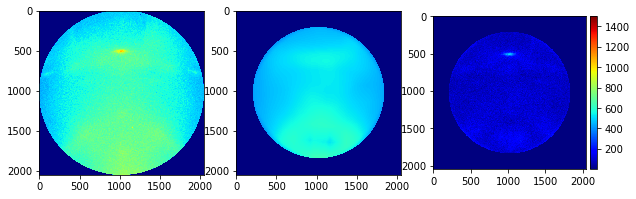

[0.0, 0.0, 0.0] [257.8578, 258.76987, 54.340299427873106] 0.0 258.7698669433594


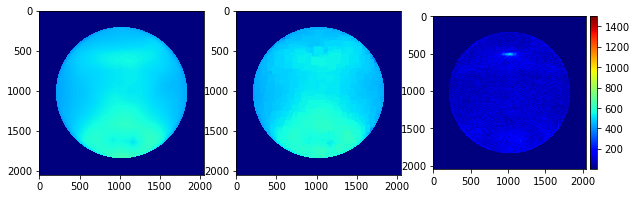

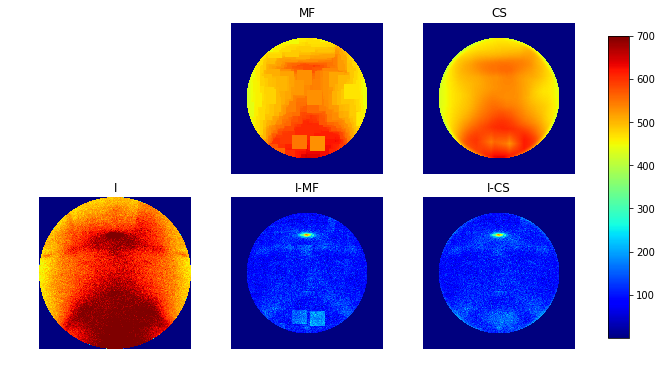

CPU times: user 13min 42s, sys: 10.3 s, total: 13min 52s
Wall time: 2min 49s


In [41]:
%%time
slac_path = slac_tif_path
slac_mf_path = slac_tif_path+ '-MF'
slac_mf_cs_path = slac_tif_path+'-MF-CS'
slac_mf_cs_crbg_path = slac_tif_path+'-MF-CS-CRBG'
os.system('mkdir -p '+slac_path)
os.system('mkdir -p '+slac_mf_path)
os.system('mkdir -p '+slac_mf_cs_path)
os.system('mkdir -p '+slac_mf_cs_crbg_path)
filt_size = 210
for i in range(1,178):
    print i
    #img = misc.imread(os.path.join(slac_tif_path+'1', slac_tif_files[i-1])).astype(np.int32)
    #img__ = Image.fromarray(img)
    #img__.save(os.path.join(slac_tif_path, str(i)+'.tif'))
    #continue
    img = misc.imread(os.path.join(slac_tif_path, slac_tif_files[i-1])).astype(np.int32)
    img_min = apply_min_filter(img)
    img_min_ = mask(img-img_min, 1024-filt_size)
    img_min__ = Image.fromarray(img_min_)
    img_min__.save(os.path.join(slac_mf_path, str(i)+'.tif'))
    img_cs = conv_bg_smooth_tf(img_min)
    #mesh_plot(img_cs)
    img_cs_ = mask(img-img_cs, 1024-filt_size)
    img_cs__ = Image.fromarray(img_cs_)
    img_cs__.save(os.path.join(slac_mf_cs_path, str(i)+'.tif'))
    #mesh_plot(img_cs)
    img_cr =  compute_ratio(img, img_cs)
    img_crbg = compute_bg(img, img_cr, img_cs)
    img_crbg_ = mask(img-img_crbg, 1024-filt_size)
    img_crbg__ = Image.fromarray(img_crbg_)
    img_crbg__.save(os.path.join(slac_mf_cs_crbg_path, str(i)+'.tif'))
    fig_plot([img, mask(img_cs, 1024-filt_size), img_cs_])
    fig_plot([img_cs, mask(img_crbg, 1024-filt_size), img_crbg_])
    fig_plot2([None, mask(img_min, 1024-filt_size), mask(img_cs, 1024-filt_size),
           img, mask(img-img_min, 1024-filt_size), 
            mask(img-img_cs, 1024-filt_size)], ['','MF', 'CS', 'I', 'I-MF', 'I-CS'], vmax=700, fig_name='Graphs/SLAC_%03d.pdf'%i)
    
    break

1 /raid/dkj755/XRD/Bruker_images-TIF/1_1.tif


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


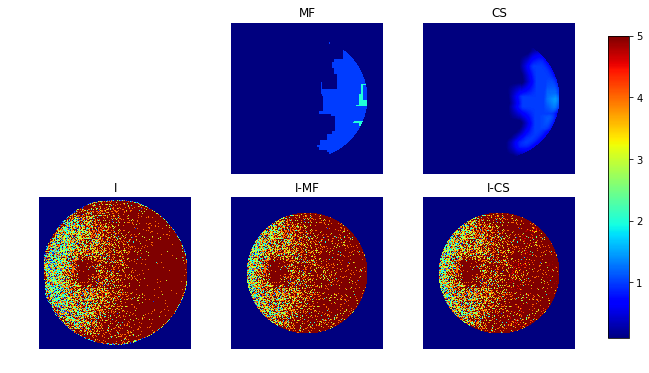

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


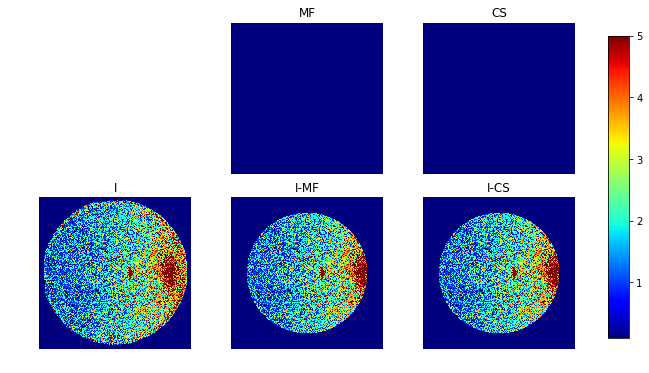

CPU times: user 27min 16s, sys: 18.2 s, total: 27min 34s
Wall time: 5min 13s


In [42]:
%%time
bruker_path = bruker_tif_path
bruker_mf_path = bruker_tif_path+ '-MF'
bruker_mf_cs_path = bruker_tif_path+'-MF-CS'
bruker_mf_cs_crbg_path = bruker_tif_path+'-MF-CS-CRBG'
os.system('mkdir -p '+bruker_path)
os.system('mkdir -p '+bruker_mf_path)
os.system('mkdir -p '+bruker_mf_cs_path)
os.system('mkdir -p '+bruker_mf_cs_crbg_path)
filt_size = 210
for i in range(1,178):
    print i, os.path.join(bruker_tif_path, bruker_tif1_files[i-1])
    #img = misc.imread(os.path.join(bruker_tif_path+'1', bruker_tif1_files[i-1]))
    #img__ = Image.fromarray(img)
    #img__.save(os.path.join(bruker_path, str(i)+'_1.tif'))
    #img = misc.imread(os.path.join(bruker_tif_path+'1', bruker_tif2_files[i-1])).astype(np.int32)
    #img__ = Image.fromarray(img)
    #img__.save(os.path.join(bruker_path, str(i)+'_2.tif'))
    #continue
    img = misc.imread(os.path.join(bruker_tif_path, bruker_tif1_files[i-1]))
    #mesh_plot(mask(img, 1024-filt_size))
    img_min = apply_min_filter(img)
    img_min_ = mask(img-img_min, 1024-filt_size)
    img_min__ = Image.fromarray(img_min_)
    #img_min__.save(os.path.join(bruker_mf_path, str(i)+'_1.tif'))

    #mesh_plot(mask(img_min, 1024-filt_size))
    img_cs = conv_bg_smooth_tf(img_min)
    #mesh_plot(img_cs)
    img_cs_ = mask(img-img_min, 1024-filt_size)
    #mesh_plot(mask(img_cs_, 1024-filt_size))
    img_cs__ = Image.fromarray(img_cs_)
    #img_cs__.save(os.path.join(bruker_mf_cs_path, str(i)+'_1.tif'))
    img_cr =  compute_ratio(img, img_cs)
    img_crbg = compute_bg(img, img_cr, img_cs)
    img_crbg_ = mask(img-img_crbg, 1024-filt_size)
    img_crbg__ = Image.fromarray(img_crbg_)
    #img_crbg__.save(os.path.join(bruker_mf_cs_crbg_path, str(i)+'_1.tif'))
    #mesh_plot(img_crbg)
    #mesh_plot(img_crbg_)
    #fig_plot([img, mask(img_cs, 1024-filt_size), img_cs_])
    #fig_plot([img_cs, mask(img_crbg, 1024-filt_size), img_crbg_])
    fig_plot2([None, mask(img_min, 1024-filt_size), mask(img_cs, 1024-filt_size),
           img, mask(img-img_min, 1024-filt_size), 
            mask(img-img_cs, 1024-filt_size)], ['','MF', 'CS', 'I', 'I-MF', 'I-CS'],vmax=5, fig_name='Graphs/Bruker_%03d_1.pdf'%i)
    
    img = misc.imread(os.path.join(bruker_tif_path, bruker_tif2_files[i-1])).astype(np.int32)
    img_min = apply_min_filter(img)
    img_min_ = mask(img-img_min, 1024-filt_size)
    img_min__ = Image.fromarray(img_min_)
    #img_min__.save(os.path.join(bruker_mf_path, str(i)+'_2.tif'))
    img_cs = conv_bg_smooth_tf(img_min)
    #mesh_plot(img)
    #mesh_plot(img_cs)
    img_cs_ = mask(img-img_cs, 1024-filt_size)
    #mesh_plot(img_cs_)
    img_cs__ = Image.fromarray(img_cs_)
    #img_cs__.save(os.path.join(bruker_mf_cs_path, str(i)+'_2.tif'))
    img_cr =  compute_ratio(img, img_cs)
    img_crbg = compute_bg(img, img_cr, img_cs)
    img_crbg_ = mask(img-img_crbg, 1024-filt_size)
    img_crbg__ = Image.fromarray(img_crbg_)
    #img_crbg__.save(os.path.join(bruker_mf_cs_crbg_path, str(i)+'_2.tif'))
    #mesh_plot(img_crbg)
    #mesh_plot(img_crbg_)
    #fig_plot([img_cs, mask(img_crbg, 1024-filt_size), img_crbg_])
    fig_plot2([None, mask(img_min, 1024-filt_size), mask(img_cs, 1024-filt_size),
           img, mask(img-img_min, 1024-filt_size), 
            mask(img-img_cs, 1024-filt_size)], ['','MF', 'CS', 'I', 'I-MF', 'I-CS'],vmax=5, fig_name='Graphs/Bruker_%03d_2.pdf'%i)
    break